<div style="text-align: right;">
2022/06/08 Yuya Saito made this.
</div>

# 1. Data Preparation

## 1.1. Information on Data Source:

- The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files
- Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
- 30 FitBit users who consented to the submission of personal tracker data.
- Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep 
monitoring, (4) daily activity and (5) steps.

## 1.2. Limitations of Data Set:
- Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
- Sample size of 30 female FitBit users is not representative of the entire female population.
- As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

# 2. Preprocess

In [15]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time

In [4]:
# read_csv function to read the required CSV file
daily_activity = pd.read_csv("./data/dailyActivity_merged.csv")
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# obtain the # of missing data points per column
missing_values_count = daily_activity.isnull().sum()
missing_values_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("# of unique Id: {}".format(unique_id))

# of unique Id: 33


In [8]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [9]:
# create new column "day_of_the_week" to represent day of the week 
daily_activity["DayOfTheWeek"] = daily_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
daily_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [11]:
# create new column "total_mins" containing sum of total minutes.
daily_activity["total_mins"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [12]:
# create new column *total_hours* by converting to hour and round float to two decimal places
daily_activity["total_hours"] = round(daily_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
daily_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

# 3. Analyze

In [21]:
# pull general statistics
daily_activity_desc = daily_activity.describe()
daily_activity_desc

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_mins,total_hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


2134.0

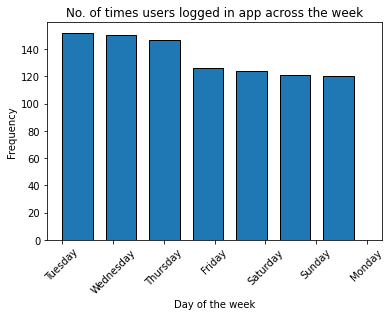

In [20]:
# plotting histogram of day of week
plt.hist(daily_activity["DayOfTheWeek"], bins = 7, 
         width = 0.6, edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.xticks(rotation=45)
plt.show()

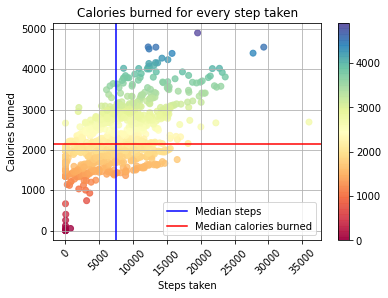

In [27]:
# plotting scatter plot between Steps taken and Calories burned
plt.scatter(daily_activity["TotalSteps"], daily_activity["Calories"], 
            alpha = 0.8, c = daily_activity["Calories"], 
            cmap = "Spectral")

# add annotations and visuals
median_calories = daily_activity_desc['Calories']['50%']
median_steps = daily_activity_desc['TotalSteps']['50%']

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.xticks(rotation=45)
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

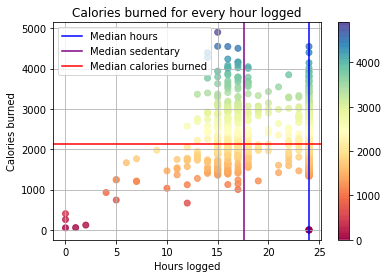

In [29]:
# plotting scatter plot
plt.scatter(daily_activity["total_hours"], daily_activity["Calories"], 
            alpha = 0.8, c = daily_activity["Calories"], 
            cmap = "Spectral")


# adding annotations and visuals
median_calories = daily_activity_desc['Calories']['50%']
median_hours = daily_activity_desc['total_hours']['50%']
median_sedentary = daily_activity_desc['SedentaryMinutes']['50%'] / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median hours")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

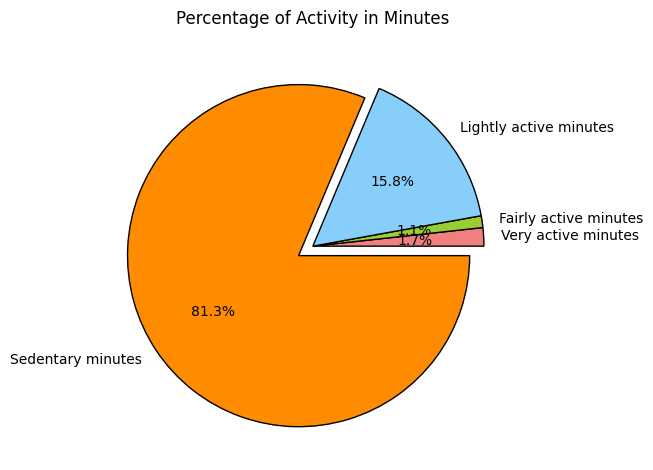

In [40]:
# calculating total of individual minutes column
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()